In [2]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
from sklearn.svm import SVC
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly import tools
import plotly.graph_objs as go

warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
color = sns.color_palette()
sns.set(style='ticks', palette="muted", color_codes=True)

In [3]:
X_, y_ = make_classification(n_features=4, n_samples=150, n_classes=3, class_sep=2, n_redundant=0, n_informative=4,
                             n_clusters_per_class=1, random_state=0)

In [4]:
X = pd.DataFrame(X_)
X.columns = ['A', 'B', 'C', 'D']

y = pd.DataFrame(y_)
y.columns = ['Target']

df = pd.concat([X, y], axis=1)

In [5]:
df.head(5)

,A,B,C,D,Target
0,-2.360,1.750,-2.497,-2.251,0
1,-2.220,1.210,-2.349,-1.352,0
2,1.548,-1.547,-0.440,-0.139,1
3,-0.299,-1.358,1.228,3.451,1
4,-3.630,-1.985,3.247,1.495,1


In [6]:
df.Target.value_counts()

2    50
1    50
0    50
Name: Target, dtype: int64

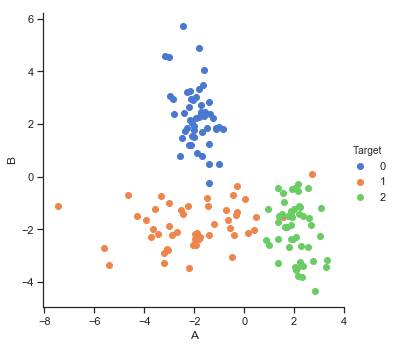

In [7]:
sns.FacetGrid(df, hue="Target", size=5).map(plt.scatter, "A", "B").add_legend();

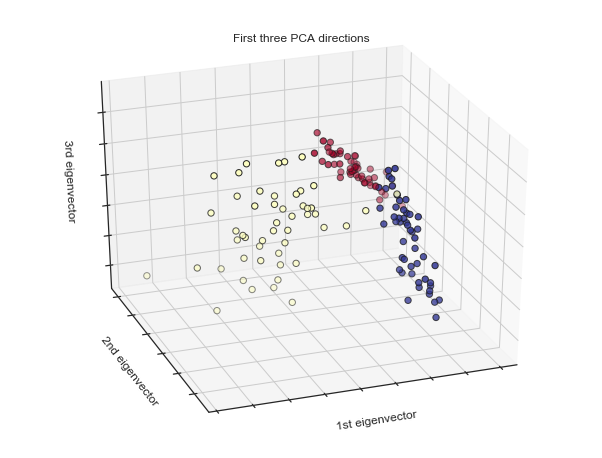

In [8]:
# http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

X_3D = X_[:, :2]

x_min, x_max = X_3D[:, 0].min() - .5, X_3D[:, 0].max() + .5
y_min, y_max = X_3D[:, 1].min() - .5, X_3D[:, 1].max() + .5

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_,
           cmap=plt.cm.RdYlBu, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

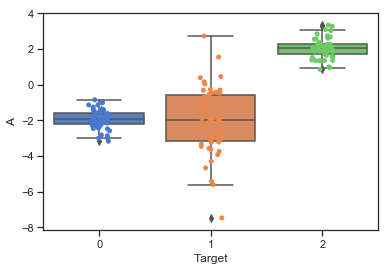

In [9]:
ax = sns.boxplot(x="Target", y="A", data=df)
ax = sns.stripplot(x="Target", y="A", data=df, jitter=True, edgecolor="gray")

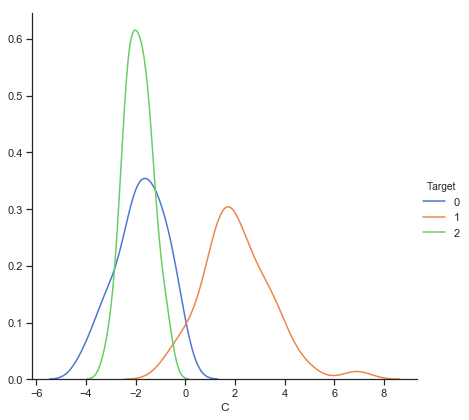

In [10]:
sns.FacetGrid(df, hue="Target", size=6).map(sns.kdeplot, "C").add_legend();

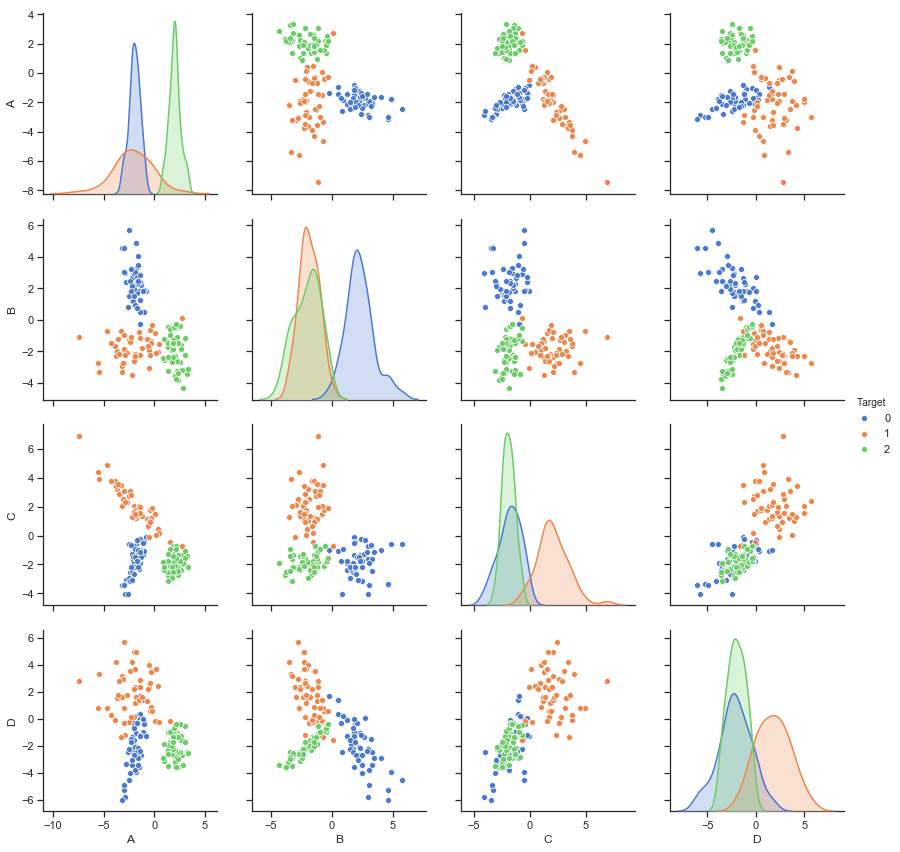

In [11]:
sns.pairplot(df, hue="Target", vars=["A", "B", "C", "D"], diag_kind="kde", size=3);

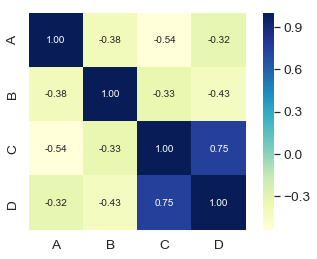

In [12]:
corrmat = X.corr()
cols = X.columns
sns.set(font_scale=1.25)
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, cmap='YlGnBu', fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [13]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split(df, test_size = 0.3)

print('Training set shape: ', train.shape)
print('Test set shape: ', test.shape)

Training set shape:  (105, 5)
Test set shape:  (45, 5)


In [14]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [15]:
MLA = [    
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = df['Target']

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, df.iloc[:,:-1], df.iloc[:,-1:], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(df.iloc[:,:-1], df.iloc[:,-1:])
    MLA_predict[MLA_name] = alg.predict(df.iloc[:,:-1])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
20,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",1.000,1.000,0.000,0.002
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.990,0.993,0.031,0.002
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.991,0.993,0.031,0.026
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",1.000,0.991,0.033,0.018
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",1.000,0.991,0.033,0.018
7,PassiveAggressiveClassifier,"{'C': 1.0, 'average': False, 'class_weight': N...",0.987,0.991,0.033,0.002
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.983,0.991,0.044,0.002
12,GaussianNB,{'priors': None},0.980,0.991,0.033,0.002
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.997,0.989,0.061,0.018
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.993,0.989,0.045,0.005


Text(0,0.5,'Algorithm')

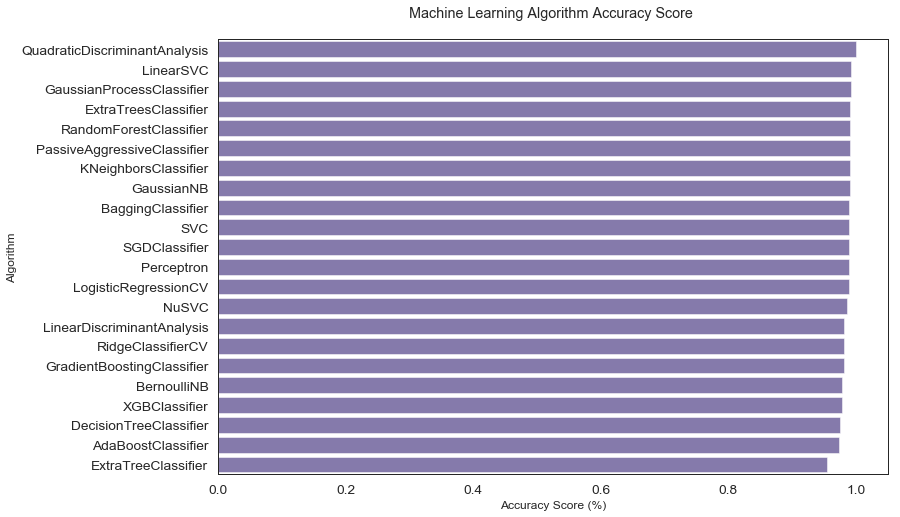

In [16]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

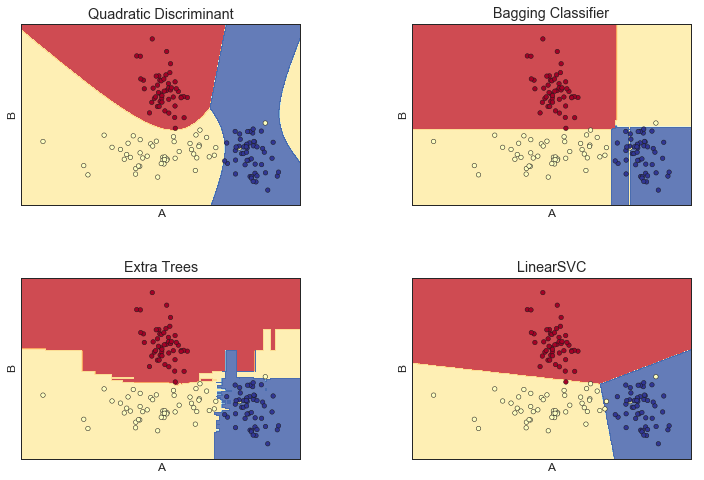

In [17]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


X = df.values[:, :2]
y = df.values[:, -1:].ravel()

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (discriminant_analysis.QuadraticDiscriminantAnalysis(),
          ensemble.BaggingClassifier(),
          ensemble.ExtraTreesClassifier(),
          svm.LinearSVC())
models = (clf.fit(X, y) for clf in models)
score = (clf.score(X, y) for clf in models)

# title for the plots
titles = ('Quadratic Discriminant',
          'Bagging Classifier',
          'Extra Trees',
          'LinearSVC')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)


X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)


for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.RdYlBu, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.RdYlBu, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('A')
    ax.set_ylabel('B')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()